In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/media/paulati/Nuevo vol/paula/dh/2021/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


In [1]:
import test.test_1_limpieza as test_1_limpieza


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


# Limpieza de Datos


<a id="section_toc"></a> 
## Tabla de Contenidos

[Intro](#section_intro)

[Dataset](#section_dataset)

[Detección de valores faltantes](#section_deteccion_faltantes)

Estrategias
  
$\hspace{.5cm}$[Drop](#section_drop)
  
$\hspace{.5cm}$[Imputación](#section_imputacion)



<a id="section_intro"></a> 
## Intro

[volver a TOC](#section_toc)

La limpieza es un paso necesario en todo proyecto de datos. 

Podemos resumir el proceso de limpieza de datos en las siguientes cinco tareas:

**1. Resolver problemas de formato y asignar tipos de datos correctos.**

Por ejemplo, cuando al pasar de CSV a Pandas una fecha no se importa correctamente como puede ser el caso de un campo fecha donde se importa 20090609231247 en lugar de 2009-06-09 23:12:47.

El formato en que se encuentran los datos determina qué operaciones pueden realizarse sobre ellos.

**2. Estandarizar categorías.**

Cuando los datos se recolectaron con un sisstema que no tiene valores tipificadaos, valores que representan la misma categoría pueden estar expresados de forma distinta. Por ejemplo: Arg, AR, Argentina

**3. Corregir valores erróneos.**

Por ejemplo: un valor numérico o inválido para describir el género; o una edad representada por un número negativo o mucho mayor que 100.

**4. Completar datos faltantes.**

Los datasets del mundo real suelen venir con datos faltantes que responden a información que se perdió o nunca se recolectó. Existen varias técnicas para completar datos faltantes. Al proceso de completar datos faltantes se lo llama "imputación".

**5. Organizar el dataset.**

Es importante estructurar las filas y columnas de la forma más conveniente. Para hacerlo se pueden aplicar las reglas del "tidy data".




<a id="section_dataset"></a> 
## Dataset

[volver a TOC](#section_toc)

https://www.kaggle.com/dansbecker/melbourne-housing-snapshot

El dataset que usaremos en esta parte, del 2017, está construido con los datos que se publicaron cada semana en https://www.domain.com.au/ 

Los datos incluyen dirección, tipo de inmueble, barrio, método de venta, habitaciones, precio, agente inmobiliario, fecha de venta y distancia a CBD (Central Business District).

Los campos que incluye son:

**Rooms**: cantidad de habitaciones

**Price**: precio en dolares

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Type**: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**SellerG**: agente inmobiliario

**Date**: fecha de venta

**Distance**: distancia a CBD

**Regionname**: región (West, North West, North, North east …etc)

**Propertycount**: cantidad de inmuebles que existen en ese suburbio.

**Bedroom2** : Scraped # habitaciones (de distintas fuentes)

**Bathroom**: cantidad de baños

**Car**: cantidad de carspots

**Landsize**: superficie

**BuildingArea**: tamaño del edificio

**CouncilArea**: municipio


Leemos los datos desde el archivo csv

In [2]:
import pandas as pd

# local
data_location = "../Data/melb_data.csv"

data = pd.read_csv(data_location)

data.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


<a id="section_deteccion_faltantes"></a> 
## Detección de valores faltantes

[volver a TOC](#section_toc)

Comenzaremos detectando qué registros tienen valores nulos, y luego vamos a contar cuántos nulos hay en cada columna.

Para eso usaremos el método `isnull` que nos devuelve otro `DataFrame` donde cada elemento es `True` o `False` dependiendo si ese elemento en el objeto DataFrame original es o no null.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html

In [3]:
is_null_result = data.isnull()
print(is_null_result.head(3))

   Suburb  Address  Rooms   Type  Price  Method  SellerG   Date  Distance  \
0   False    False  False  False  False   False    False  False     False   
1   False    False  False  False  False   False    False  False     False   
2   False    False  False  False  False   False    False  False     False   

   Postcode  ...  Bathroom    Car  Landsize  BuildingArea  YearBuilt  \
0     False  ...     False  False     False          True       True   
1     False  ...     False  False     False         False      False   
2     False  ...     False  False     False         False      False   

   CouncilArea  Lattitude  Longtitude  Regionname  Propertycount  
0        False      False       False       False          False  
1        False      False       False       False          False  
2        False      False       False       False          False  

[3 rows x 21 columns]


Otra forma es usando el método `notnull`

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.notnull.html

In [4]:
is_notnull_result = data.notnull()
print(is_notnull_result.head(3))

   Suburb  Address  Rooms  Type  Price  Method  SellerG  Date  Distance  \
0    True     True   True  True   True    True     True  True      True   
1    True     True   True  True   True    True     True  True      True   
2    True     True   True  True   True    True     True  True      True   

   Postcode  ...  Bathroom   Car  Landsize  BuildingArea  YearBuilt  \
0      True  ...      True  True      True         False      False   
1      True  ...      True  True      True          True       True   
2      True  ...      True  True      True          True       True   

   CouncilArea  Lattitude  Longtitude  Regionname  Propertycount  
0         True       True        True        True           True  
1         True       True        True        True           True  
2         True       True        True        True           True  

[3 rows x 21 columns]


<div id="caja1" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/haciendo_foco.png" style="align:left"/> </div>
  <div style="float:left;width: 85%;"><label>
Observen, para cada elemento, la relación entre los valores en cada objeto DataFrame resultado (is_null_result y is_notnull_result).</label></div>
</div>

Para ver cuántos nulos hay en cada columna usaremos `sum` sobre el `DataFrame` resultado de `isnull`

In [5]:
cant_nulls = is_null_result.sum()
print(cant_nulls)

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


Vemos que sólo cuatro campos tienen valores faltantes: Car, BuildingArea, YearBuilt, CouncilArea

<div id="caja2" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/ponete_a_prueba.png" style="align:left"/> </div>
  <div style="float:left;width: 85%;"><label>
      ¿Cómo vemos cuántos elementos <b>no nulos tenemos en cada columna</b> del objeto DataFrame?
</label></div>
</div>

In [7]:
def not_null_column_count(data):    
    # cambiar aquí:
    result = data.notnull().sum()    
    return(result)

# data es el objeto DataFrame que leimos:
resultado = not_null_column_count(data)
test_1_limpieza.test_not_null_column_count(data, resultado)

'Muy bien!!'

<div id="caja3" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/ponete_a_prueba.png" style="align:left"/> </div>
  <div style="float:left;width: 85%;"><label>
¿Cómo vemos cuántos elementos <b>no nulos tenemos en cada fila</b> del objeto DataFrame?
<br/>
Ayuda: Ver el argumento axis en la  <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html">documentación</a>
</label></div>

</div>

In [8]:
def not_null_row_count(data):    
    # cambiar aquí:
    result = data.notnull().sum(axis=1)   
 
    return(result)

# data es el objeto DataFrame que leimos:
resultado = not_null_row_count(data)
test_1_limpieza.test_not_null_row_count(data, resultado)

'Muy bien!!'


<a id="section_drop"></a> 
## Drop

[volver a TOC](#section_toc)

Una vez que detectamos los datos faltantes de nuestro DataFrame, debemos decidir qué hacer con ellos.

Una forma de proceder consiste en eliminar los registros o los campos que presentan algún dato faltante:

* Ventaja: fácil implementación
* Desventaja: pérdida importante de información, posibles sesgos en los estimadores de los parámetros.

Este método **asume que la falta de respuesta se generó de forma aleatoria**, y por lo general ésto no sucede. 

Si los datos que faltan son pocos y al azar, entonces este método es el ideal.


Algunas de las opciones son:

* Eliminar todas las columnas que tengan algún valor faltante

* Eliminar todas las filas que tengan algún valor faltante

* Eliminar todas las columnas que tengan todos los registros con valor faltante

* Eliminar todas las filas que tengan todos los campos con valor faltante

* Eliminar todas las columnas que tengan una cantidad de registros con valor (no nulos) menor a un umbral (threshold) 

* Eliminar todas las filas que tengan una cantidad de campos con valor (no nulos) menor a un umbral (threshold) 

(Otras estrategias que veremos un poco más adelante son la imputación de valores faltantes.)

El método que vamos a usar para todas las opciones acá listadas es `dropna`

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html


### Eliminar todas las columnas que tengan algún valor faltante

In [9]:
data_columnas_completas = data.dropna(axis = 1)
print(data.shape)
print(data_columnas_completas.shape)

(13580, 21)
(13580, 17)


### Eliminar todas las filas que tengan algún valor faltante

In [10]:
data_filas_completas = data.dropna()
print(data.shape)
print(data_filas_completas.shape)

(13580, 21)
(6196, 21)


es equivalente a 

In [11]:
data_filas_completas = data.dropna(axis = 0)
print(data.shape)
print(data_filas_completas.shape)

(13580, 21)
(6196, 21)


<div id="caja4" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/haciendo_foco.png" style="align:left"/> </div>
  <div style="float:left;width: 85%;"><label>Observemos que por default dropna me devuelve un objeto DataFrame nuevo, no modifica el original.
<br /> Si el argumento inplace tiene valor True, devuelve None y sí modifica el objeto DataFrame original.
</label></div>
</div>


### Eliminar todas las columnas que tengan todos los registros con valor faltante

In [13]:
data_clean_empty_col = data.dropna(axis = 1, how= 'all')
print(data.shape)
print(data_clean_empty_col.shape)

(13580, 21)
(13580, 21)


### Eliminar todas las filas que tengan todos los campos con valor faltante

In [14]:
data_clean_empty_row = data.dropna(axis = 0, how= 'all')
print(data.shape)
print(data_clean_empty_row.shape)

(13580, 21)
(13580, 21)


### Eliminar todas las columnas que tengan una cantidad de registros con valor (no nulos) menor a un umbral (threshold)

In [15]:
# quiero que como maximo haya 100 nulos por columna:
umbral= 13480
data_clean_col_with_many_null = data.dropna(axis = 1, thresh=umbral)
print(data.shape)
print(data_clean_col_with_many_null.shape)

(13580, 21)
(13580, 18)


### Eliminar todas las filas que tengan una cantidad de campos con valor (no nulos) menor a un umbral (threshold)

In [16]:
# quiero que como maximo haya 3 columnsa en null por registro:
umbral = 18
data_clean_row_with_many_null = data.dropna(axis = 0, thresh=umbral)
print(data.shape)
print(data_clean_row_with_many_null.shape)


(13580, 21)
(13550, 21)


<div id="caja5" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/ponete_a_prueba.png" style="align:left"/> </div>
  <div style="float:left;width: 85%;"><label>
      Queremos ahora eliminar las columnas del objeto data que tienen al menos 40% de los registros en null.
<br />       Escribamos una función que reciba como parámetros el DataFrame y el valor del porcentaje expresado como un número entre 0 y 1 y nos devuelva el DataFrame "limpio".
</label></div>
</div>

In [22]:
def drop_columns_umbral(data, umbral):
    # cambiar aquí:
    result = data.dropna(axis=1, thresh=(1-umbral)*data.shape[0])    
    return(result)

umbral = 0.4 
# data es el objeto DataFrame que leimos:
resultado = drop_columns_umbral(data, umbral)
test_1_limpieza.test_drop_columns_umbral(data, umbral, resultado)
 

'Muy bien!!'

<a id="section_imputacion"></a> 

## Imputación de valores faltantes

[volver a TOC](#section_toc)


### Métodos de imputación

#### Imputación Simple:

Consiste en asignar un valor por cada dato faltante a partir de la propia variable o las demás variables para lograr una base de datos completa.


#### Imputación Múltiple:

A cada valor faltante se le asigna un grupo de m valores, generando m bases de datos completas. En cada una de las m bases de datos se estiman los parámetros de interés y luego se combinan los resultados obtenidos.

#### Imputación por Media

Se puede completar los valores faltantes reemplazandolos por la media de la serie o por la media condicionada a determinada categoría. 

Por ejemplo, dado un valor de estatura faltante para una mujer, reemplazarlo por la media de las mujeres. 

Este enfoque tiene ventajas y desventajas:

* Ventajas: Es simple y, para algunas distribuciones de datos, es muy probable acercarme al verdadero valor del dato faltante
* Desventajas:
Reduzco artificialmente la variabilidad y la aleatoriedad de los datos, lo cual me puede llevar a conclusiones equivocadas. Si existía correlación entre esta variable y otras, ese valor puede verse afectado.

#### Imputación Hot Deck

Consiste en completar con un dato existente de la muestra, siguiendo algún criterio. Pueden ser aleatorios (se elige un elemento al azar), secuencial (se completa con el valor inmediatamente anterior o posterior) o vecino más cercano.

#### Imputación por Regresión

Se emplean modelos de regresión para estimar el dato que falta a partir de las demás variables del dataset. 


---

`pandas` provee métodos para imputación de valores faltantes.

El método `fillna`, permite varios tipos de imputación que puede especificarse en el parámetro "method"

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

* Completar los datos con valores definidos por fuera del dataset (method = None). 

* Completar los datos faltantes con el valor anterior o el siguiente (ideal para series de tiempo) (method = ffill) o (method = bfill)

* Completar por la media, moda o la mediana. data.fillna(data.mean())

Vemos en la documentación los valores que puede tomar el parámetro `method`:

pad / ffill: propagan la última observación válida, completando hasta la siguiente observación válida

backfill / bfill: usa la siguiente observación válida para completar el dato faltante






Más arriba vimos que los campos con datos faltantes son:
* Car:                62
* BuildingArea:     6450
* YearBuilt:        5375
* CouncilArea:      1369

Y vamos a intentar imputar estos valores faltantes.

Antes de eso vamos a ver qué valores tomas esos campos, y usar algunas de las cosas que vimos en las prácticas de estadística descriptiva y probabilidades.

A continuación tenemos el código que usaremos para graficar histogramas y distribuciones:

In [23]:
import seaborn as sns
def count_plotter(data, label, labelsize=12):    
    sns.set(rc={"figure.figsize": (10, 7), 
                "xtick.labelsize": labelsize})
    sns.set_style("white")    
    data_count = sns.countplot(x=data)
    data_count.set_title('Histograma de ' + label + '\n', fontsize=16)

    
#def distribution_plotter(data, label, bins=None):    
def distribution_plotter(data, label, bin_width=200):    
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style("white")    
    #dist = sns.distplot(data, bins= bins, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    dist = sns.histplot(data, 
                        stat = 'density', kde = True, 
                        line_kws = {'linewidth':5}, 
                        binwidth = bin_width)        
    dist.set_title('Distribucion de ' + label + '\n', fontsize=16)    
    


#### Car

Vamos a ver que forma toman los valores del campo Car:

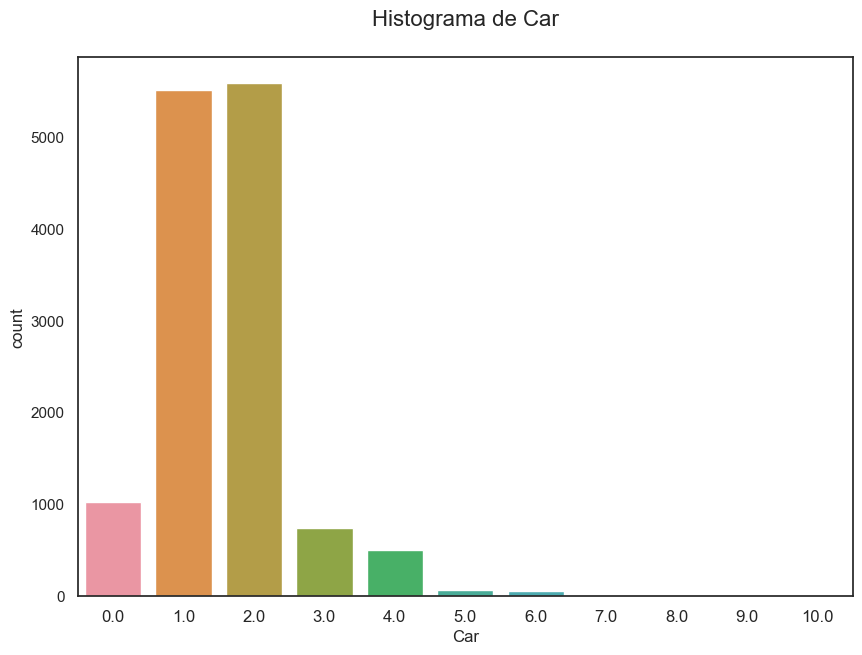

In [24]:
count_plotter(data.Car, "Car")

También podemos verlo con el método `value_counts` que ya conocemos:

In [25]:
pd.value_counts(data.Car)

2.0     5591
1.0     5509
0.0     1026
3.0      748
4.0      506
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: Car, dtype: int64

Vemos que los valores más probables para el campo Car son 1 y 2. 

Vamos a imputar los valores faltantes de este campo de dos formas diferentes:
* La primera, asignamos un 2 a todos los faltantes en Car
* La segunda, asignamos al 45% de los valores faltantes valor 1, y al resto valor 2

Y para terminar verificamos que lo hicimos correctamente

##### Asignamos un 2 a todos los valores faltantes de Car

Contamos cuantos 2 y cuántos null hay en Car:

In [26]:
data_car_2_mask = data.Car == 2
data_car_2_count = data_car_2_mask.sum()
print(data_car_2_count)
print("---")
data_car_null_mask = data.Car.isnull()
data_car_null_count = data_car_null_mask.sum()
print(data_car_null_count)

5591
---
62


Rellenamos:

In [27]:
data_car_2_fill = data.Car.fillna(2)
# inventamos una columna nueva para no modificar los datos originales y 
# que nos sirva para el siguiente ejercicio sin volver a leer los datos:
data["Car_fill"] = data_car_2_fill

Volvemos a contar:

In [28]:
data_car_2_mask = data.Car_fill == 2
data_car_2_count = data_car_2_mask.sum()
print(data_car_2_count)
print("---")
data_car_null_mask = data.Car_fill.isnull()
data_car_null_count = data_car_null_mask.sum()
print(data_car_null_count)

5653
---
0


Tiene que haber 5591 + 62 = 5653, lo hicimos bien!! :)

##### Asignamos al 45% de los valores faltantes valor 1, y al resto valor 2

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.difference.html

Antes de empezar, contemos cuántos registros tenemos con valor de Car:
* null
* 1
* 2

In [29]:
cant_car_null = data.Car.isnull().sum()
print(cant_car_null)

car_one_mask = data.Car == 1
cant_car_1 = car_one_mask.sum()
print(cant_car_1)

car_two_mask = data.Car == 2
cant_car_2 = car_two_mask.sum()
print(cant_car_2)


62
5509
5591


In [30]:
# los registros que son null en Car:
data_car_null_mask = data.Car.isnull()
data_car_null = data.loc[data_car_null_mask, :]
print(data_car_null.shape[0])

# una muestra del 45% de los registros calculados en el paso anterior:
data_car_null_mask_sample_1 = data_car_null.sample(frac = 0.45)

# los índices de ese 45%
data_car_null_ones_index = data_car_null_mask_sample_1.index
print(len(data_car_null_ones_index))

# los que van a ser rellenados con valor 2 son todos los que no fueron seleccionados en el paso anterior:
data_car_null_twos_index = data_car_null.index.difference(data_car_null_ones_index)
print(len(data_car_null_twos_index))


62
28
34


Ahora que tenemos los index que nos sirven, asignamos los valores correspondientes a los registros seleccionados:

In [31]:
data.loc[data_car_null_ones_index, "Car"] = 1
data.loc[data_car_null_twos_index, "Car"] = 2

Inicialmente teníamos:
* 62 valores nulos, de los cuales 28 tomaron valor 1 y 34 tomaron valor 2;
* 5509 registros con valor 1;
* 5591 registros con valor 2

Deberíamos tener ahora:
* 0 valores nulos;
* 5509 + 28 = 5537 registros con valor 1;
* 5591 + 34 = 5625 registros con valor 2

Contemos cuántos tenemos ahora, a ver si hicimos las cosas bien:

In [32]:
cant_car_null = data.Car.isnull().sum()
print(cant_car_null)

car_one_mask = data.Car == 1
cant_car_1 = car_one_mask.sum()
print(cant_car_1)

car_two_mask = data.Car == 2
cant_car_2 = car_two_mask.sum()
print(cant_car_2)


0
5537
5625


Y coinciden con los valores esperados, excelente! :)

<div id="caja6" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/para_seguir_pensando.png" style="align:left"/> </div>
  <div style="float:left;width: 85%;"><label>
      ¿Por qué hicimos sample una sóla vez?  <br />
      ¿Por qué no hicimos data_car_null.sample(frac = 0.45) seguido de data_car_null.sample(frac = 0.55)?  <br />
      ¿Si lo hicieramos obtendríamos el mismo resultado? <br />
      Si no se imaginan la respuesta, pueden probarlo y tratar de entender la salida.
      </label></div>
</div>

#### BuildingArea

Vemos que este campo tiene una proporción de nulos alta (6450 / 13580 que es aprox. 48% )

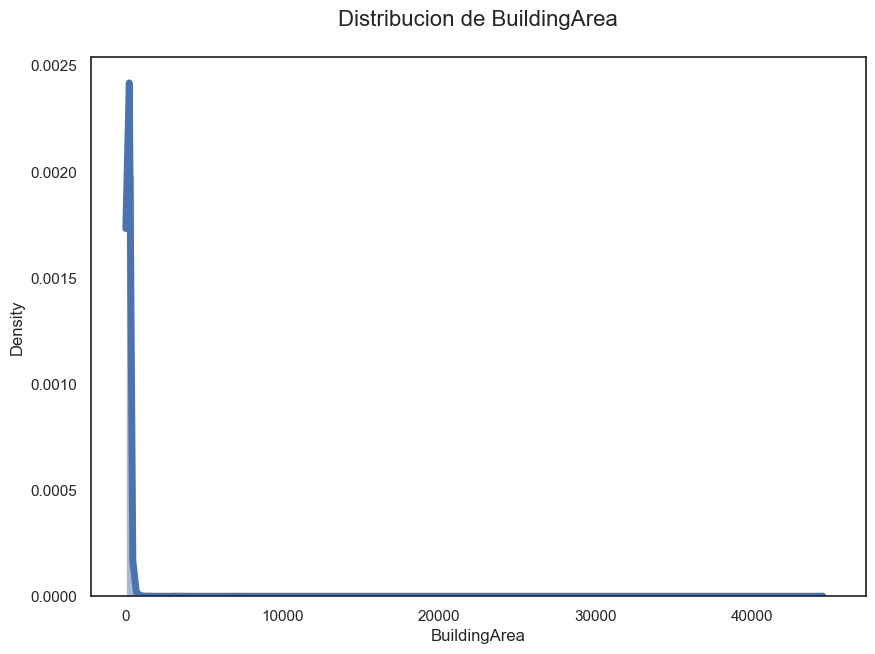

In [33]:
#distribution_plotter_warn(data.BuildingArea, "BuildingArea")
distribution_plotter(data.BuildingArea, "BuildingArea", bin_width=500)

Vemos que hay muchos outliers, ¿qué forma toma la distribución si nos quedamos sólo con valores menor a 1000?

Usemos para eso boolean indexing:

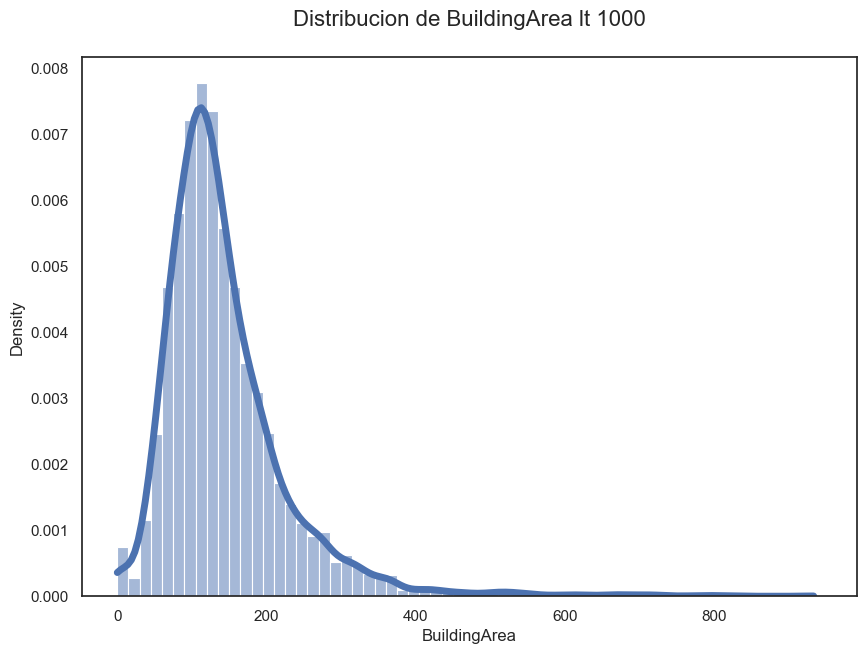

In [34]:
data_building_area_lt_1000_mask = data.BuildingArea < 1000
data_building_area_lt_1000 = data.loc[data_building_area_lt_1000_mask, :]
#distribution_plotter_warn(data_building_area_lt_1000.BuildingArea, "BuildingArea lt 1000")
distribution_plotter(data_building_area_lt_1000.BuildingArea, "BuildingArea lt 1000", bin_width = 15)

In [35]:
print(data_building_area_lt_1000.BuildingArea.mean())
print(data_building_area_lt_1000.shape)
print(data_building_area_lt_1000.BuildingArea.median())
print(data_building_area_lt_1000.BuildingArea.std())
print("----")
print(data.BuildingArea.mean())
print(data.shape)
print(data.BuildingArea.median())
print(data.BuildingArea.std())


143.32860765234483
(7122, 22)
126.0
83.01166687168542
----
151.96764988779805
(13580, 22)
126.0
541.0145376263513


Podemos pensar en imputar los valores faltantes con el valor de la media o la mediana del dataset completo o del dataset reducido que usamos en el último plot, pero la proporción de nulos es muy alta en ese campo y el rango de valores muy amplio como para considerar buena esa imputación. Por lo tanto, vamos a eliminar esa columna.

Antes de pasar al siguiente campo, veamos cómo cambiarían los valores que calculamos arriba si imputáramos con la media los valores faltantes de ese campo:

In [36]:
media = 152

data_fill = data.BuildingArea.fillna(media)

#piso los datos originales:
data.BuildingArea = data_fill

print(data.BuildingArea.mean())
print(data.shape)
print(data.BuildingArea.median())
print(data.BuildingArea.std())


151.983015
(13580, 22)
152.0
392.00296216756965


Y vemos que modificamos mucho la dispersión de estos datos, de forma que no representan la naturaleza inicial de estos datos.

#### YearBuilt

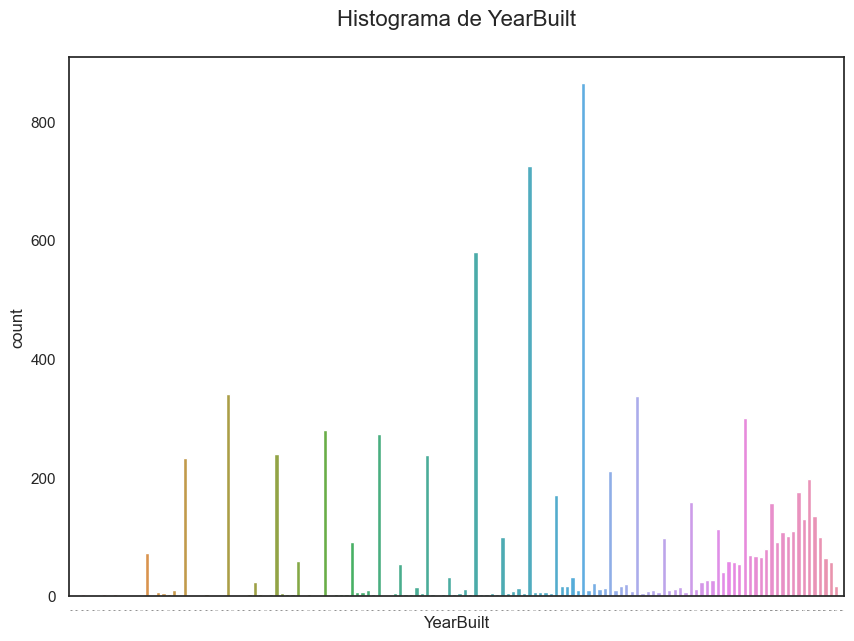

In [37]:
count_plotter(data.YearBuilt, "YearBuilt",0)

Este caso es muy parecido al anterior, un porcentaje alto de nulos y mucha dispersión en los valores, por lo tanto no vamos a completar los datos faltantes en esa columna.

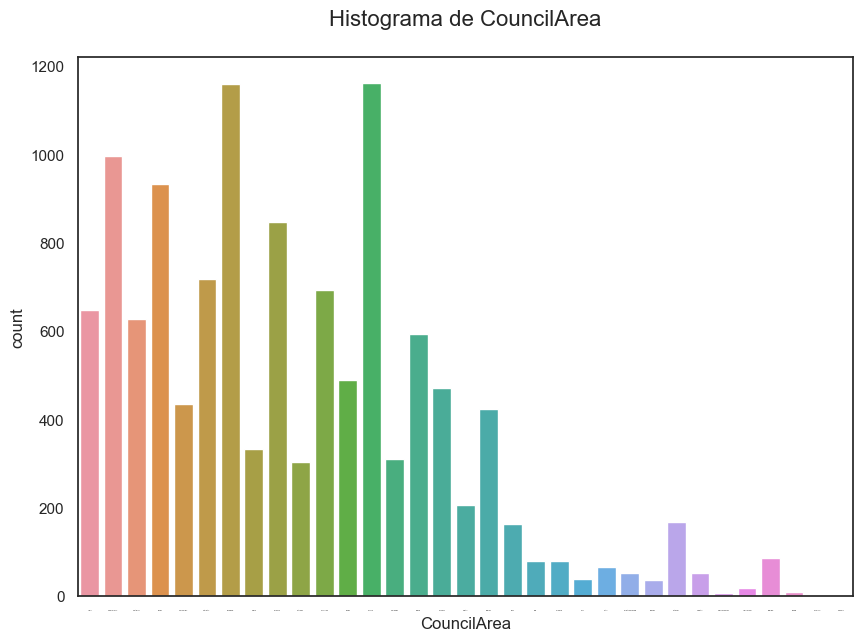

In [38]:
count_plotter(data.CouncilArea, "CouncilArea", 0)

In [39]:
pd.value_counts(data.CouncilArea)

Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Maroondah              80
Knox                   80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Moorabool               1
Unavailable             1
Name: CouncilArea, dtype: int64

<div id="caja6" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/ponete_a_prueba.png" style="align:left"/> </div>
  <div style="float:left;width: 85%;"><label>
¿Qué harían con este campo (CouncilArea)?
</label></div>
</div>